In [1]:
! pip install -r requirements_bert.txt

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch
from matplotlib import pyplot as plt

In [2]:
# Load BERT data
df = pd.read_pickle('/work/NLP/pkl_files_test/20230524_BERT.pkl')

In [3]:
df.head()

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,Killa Cam,rap,Cam'ron,2004,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Cam...",1,762
1,Can I Live,rap,JAY-Z,1996,"Yeah, hah, yeah, Roc-A-Fella We invite you to ...",3,548
2,Forgive Me Father,rap,Fabolous,2003,Maybe cause I'm eatin And these bastards fiend...,4,574
3,Down and Out,rap,Cam'ron,2004,"Ugh, Killa! Baby! Kanye, this that 1970s Heron...",5,760
4,Fly In,rap,Lil Wayne,2005,"So they ask me ""Young boy What you gon' do the...",6,432


In [10]:
# Generate Subset
sample_size = 10000
df_sub = df.groupby('tag').apply(lambda x: x.sample(n=sample_size, random_state=1)).reset_index(drop=True)

In [11]:
len(df_sub)

50000

In [12]:
df_sub.head()

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,No More,country,Brandon Jenkins,2011,I graduated school and set out my way To the w...,857688,277
1,Shes Crazy for Leaving,country,Guy Clark,2015,Well the bus pulled away In a roaring black cl...,675197,186
2,On the One Road,country,Musical Blades,2020,We're on the one road Sharing the one load We'...,6013368,266
3,Wisdom Of A Fool,country,Jacky Ward,1978,If you're lucky enough To have someone who lov...,2962678,155
4,Same Ol Story,country,Rhett Akins,1995,You let him by with another line again And oh ...,1208546,190


In [4]:
df_sub = df.copy()

In [5]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Assuming your DataFrame is called df and 'tag' is the column you want to encode
tags = df_sub['tag']

# Fit the label encoder on the tags and transform the tags column
encoded_tags = label_encoder.fit_transform(tags)

# Replace the original 'tag' column with the encoded values
df_sub['tag'] = encoded_tags

In [6]:
df_sub.head()

,title,tag,artist,year,lyrics,id,lyrics_word_count
0,Killa Cam,2,Cam'ron,2004,"Killa Cam, Killa Cam, Cam Killa Cam, Killa Cam...",1,762
1,Can I Live,2,JAY-Z,1996,"Yeah, hah, yeah, Roc-A-Fella We invite you to ...",3,548
2,Forgive Me Father,2,Fabolous,2003,Maybe cause I'm eatin And these bastards fiend...,4,574
3,Down and Out,2,Cam'ron,2004,"Ugh, Killa! Baby! Kanye, this that 1970s Heron...",5,760
4,Fly In,2,Lil Wayne,2005,"So they ask me ""Young boy What you gon' do the...",6,432


In [7]:
# Split into train and test sets, with stratifying
X_train, X_temp, y_train, y_temp = train_test_split(df_sub['lyrics'], df_sub['tag'], test_size=0.3, random_state=42, stratify=df_sub['tag'])

# Split the temporary test set into 50% test and 50% validation (15% of the total data each)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [8]:
y_train.value_counts()

tag
1    1005005
2     697605
4     447783
3     111075
0      59161
Name: count, dtype: int64

In [8]:
! pip install transformers

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from transformers import AutoTokenizer
PRETRAINED_LM = "bert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_LM)
tokenizer

/home/ucloud/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


BertTokenizerFast(name_or_path='bert-base-cased', vocab_size=28996, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)

In [10]:
tokenizer.is_fast

True

In [11]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=512, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

In [12]:
train_input_ids, train_att_masks = encode(X_train.values.tolist())
# Save the tensor to disk
torch.save(train_input_ids, './ries_tensors/bert_cased_train_input_id.pt')
torch.save(train_att_masks, './ries_tensors/bert_cased_train_att_masks.pt')


: 

: 

In [ ]:
valid_input_ids, valid_att_masks = encode(X_val.values.tolist())
# Save the tensor to disk
torch.save(valid_input_ids, './ries_tensors/bert_cased_valid_input_ids.pt')
torch.save(valid_att_masks, './ries_tensors/bert_cased_valid_att_masks.pt')


In [ ]:
test_input_ids, test_att_masks = encode(X_test.values.tolist())
# Save the tensor to disk
torch.save(test_input_ids, './ries_tensors/bert_cased_test_input_ids.pt')
torch.save(test_att_masks, './ries_tensors/bert_cased_test_att_masks.pt')

In [37]:
# How to load the tensors
loaded_tensor = torch.load('bert_cased_trained_input_id.pt')
print(loaded_tensor)

tensor([[  101,   146,  9562,  ...,  4218,  1136,   102],
        [  101,  1284,  1202,  ...,     0,     0,     0],
        [  101,   146,  1821,  ...,     0,     0,     0],
        ...,
        [  101,   157,  8167,  ...,     0,     0,     0],
        [  101,   146,  1180,  ...,     0,     0,     0],
        [  101,   113, 12511,  ...,     0,     0,     0]])


In [ ]:
! pip install torch

In [ ]:
import torch
train_y = torch.LongTensor(y_train.values.tolist())
valid_y = torch.LongTensor(y_val.values.tolist())
test_y = torch.LongTensor(y_test.values.tolist())
train_y.size(),valid_y.size(),test_y.size()

In [17]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 16
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

valid_dataset = TensorDataset(valid_input_ids, valid_att_masks, valid_y)
valid_sampler = SequentialSampler(valid_dataset)
valid_dataloader = DataLoader(valid_dataset, sampler=valid_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [18]:
from transformers import BertForSequenceClassification
N_labels = len(y_train.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [20]:
model = model.cuda()

In [23]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

EPOCHS = 2
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer, 
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

In [24]:
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)
        
        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))              


    '''
    Validation
    '''
    model.eval()
    valid_loss = 0
    valid_pred = []
    with torch.no_grad():
        for step_num_e, batch_data in enumerate(tqdm(valid_dataloader,desc='Validation')):
            input_ids, att_mask, labels = [data.to(device) for data in batch_data]
            output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

            loss = output.loss
            valid_loss += loss.item()
   
            valid_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
        
    val_loss_per_epoch.append(valid_loss / (step_num_e + 1))
    valid_pred = np.concatenate(valid_pred)

    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(X_train) / BATCH_SIZE), train_loss / (step_num + 1)))
    print("{0}/{1} val loss: {2} ".format(step_num_e+1, math.ceil(len(X_val) / BATCH_SIZE), valid_loss / (step_num_e + 1)))

Epoch:  1


Training:   0%|          | 0/2188 [00:00<?, ?it/s]

Validation:   0%|          | 0/469 [00:00<?, ?it/s]

2188/2188 train loss: 0.8226824172277011 
469/469 val loss: 1.0291805156766733 
Epoch:  2


Training:   0%|          | 0/2188 [00:00<?, ?it/s]

Validation:   0%|          | 0/469 [00:00<?, ?it/s]

2188/2188 train loss: 0.7801189320996214 
469/469 val loss: 1.0365972937678478 


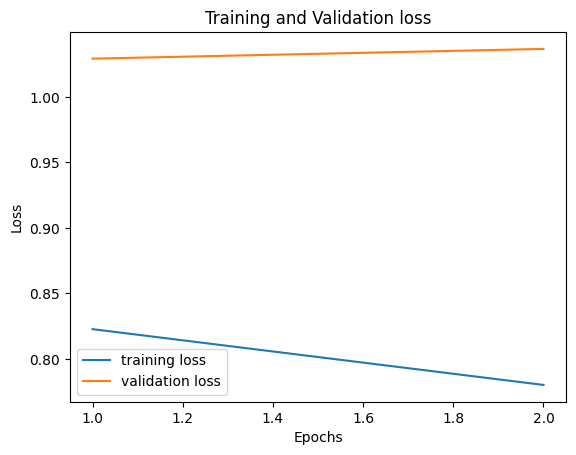

In [25]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.plot(epochs, val_loss_per_epoch, label = 'validation loss' )
ax.set_title('Training and Validation loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

In [26]:
from sklearn.metrics import classification_report
print('classifiation report')
print(classification_report(valid_pred, y_val))

classifiation report
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      1766
           1       0.30      0.38      0.33      1183
           2       0.76      0.80      0.78      1424
           3       0.59      0.61      0.60      1462
           4       0.60      0.54      0.56      1665

    accuracy                           0.60      7500
   macro avg       0.60      0.59      0.60      7500
weighted avg       0.62      0.60      0.61      7500



In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) 
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False) 
  plt.title("Normalized confusion matrix")
  plt.show()

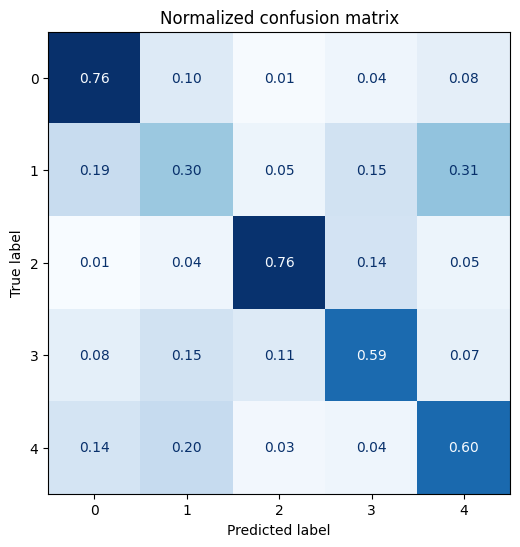

In [28]:
plot_confusion_matrix(valid_pred,y_val)